# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = 3x^{2}ln(x) + x^2$

In [137]:
import sympy as sm
# использован sympy для нахождения производной, потому что это красиво
x = sm.symbols("x")
y = x**3 * sm.ln(x)
y

x**3*log(x)

In [138]:
y_der = sm.diff(y, x)
y_der

3*x**2*log(x) + x**2

In [139]:
import math
# в дальнейшем sympy не использован, так как у него гораздо ниже скорость вычислений
def y(x: float):
  return x**3 * math.log(x)

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [23]:
def dy(x0: float):
    """
    Реализуйте функцию
    """
    if x0 <= 0: 
      raise ArithmeticError("x0 must be > 0")
    return 3 * x0**2 * math.log(x0) + x0**2

print(dy(math.e))
print(dy(1))
print(dy(0.0001))

29.556224395722598
1.0
-2.663102111592855e-07


3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [63]:
from typing import List

def get_min_with_gd(x0: float, steps: int, lr: float, thershold: float) -> List[float]:
    """
    Реализуйте функцию
    """
    current_point = x0
    points = [current_point]
    for step in range(steps):
      current_der = dy(current_point)
      current_point = current_point - lr * current_der/abs(current_der)
      points.append(current_point)
      if abs(y(points[-1]) - y(points[-2])) <= thershold:
        break
    return points

In [60]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(10, 1000, 0.01, 0.0001)

4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

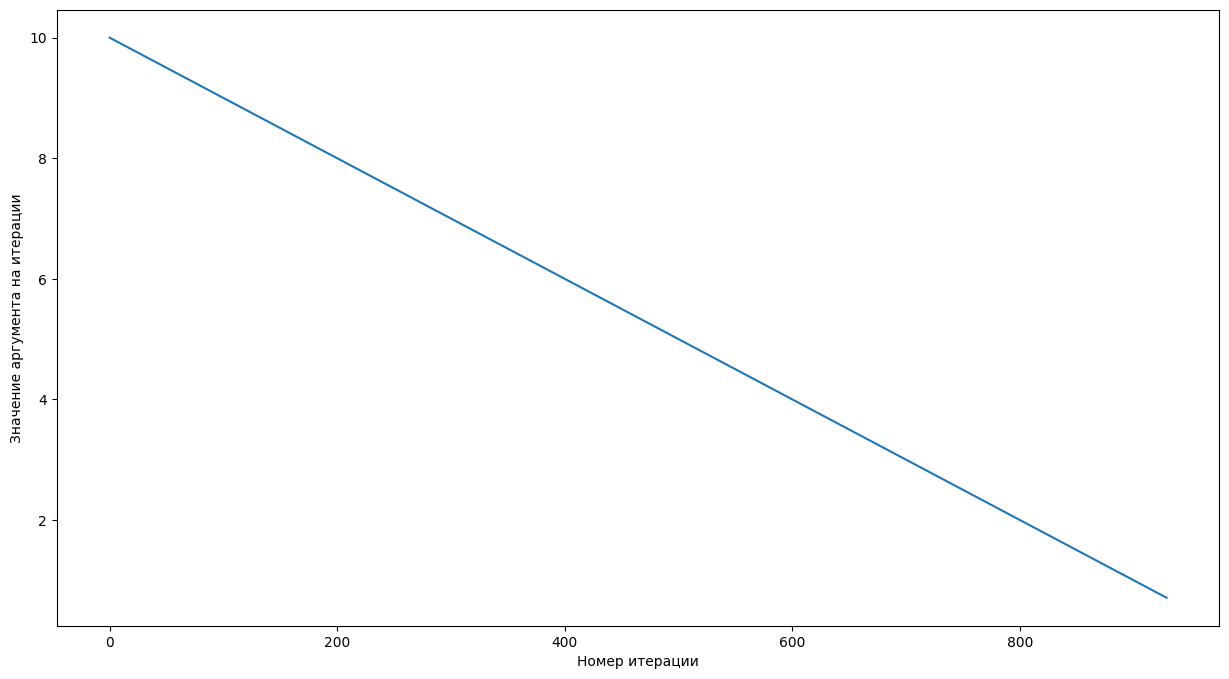

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

In [62]:
history[-1]

0.7100000000001694

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [127]:
def get_min_with_rmsprop(x0: float, steps: int=1000, lr: float=0.001, betta: float=0.99,
                         thershold: float = 0.0001, eps: float = 0.0001) -> List[float]:
    current_point = x0
    current_gamma = 0
    points = [current_point]
    for step in range(steps):
      current_dev = dy(current_point)
      current_gamma = (1-betta)*current_gamma + betta * current_dev**2
      current_point = current_point - (lr / (current_gamma + eps)**(1/2)) * current_dev
      points.append(current_point)
      if abs(points[-1] - points[-2]) < thershold:
        break
    return points

In [134]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2
#в нуле производная не определена

history_rmsprop_1 = get_min_with_rmsprop(0.01, steps=1500) 
history_rmsprop_2 = get_min_with_rmsprop(2, steps=1500)

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

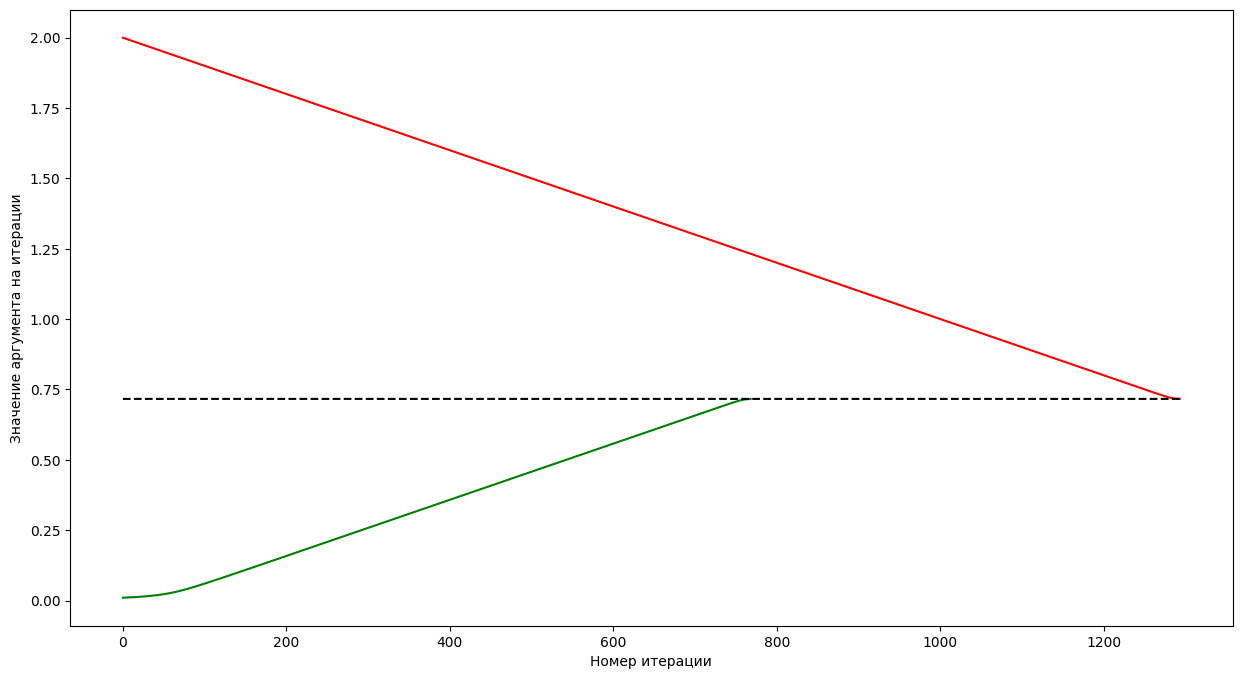

In [136]:
plt.figure(figsize=(15, 8))

steps = max(len(history_rmsprop_1), len(history_rmsprop_2))
plt.plot(history_rmsprop_1, 'g')
plt.plot(history_rmsprop_2, 'r')
plt.plot([0.716531313677]*steps, 'k--')

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

Реальный минимум приблизительно равен 0.716531313677 (значение функции = -0.1226264803905)

Начав из точки 0.01, алгоритм дошёл до минимума быстрее, чем из точки 2, что неудивительно, учитывая, что 0.01 ближе к минимуму